# KITTI Dataset Exploration

For simple understanding of KITTI dataset we are provided with few files in data dir as represented below.
```bash
.
├── data
│   ├── calib
│   │   └── 000007.txt
│   ├── image_2
│   │   └── 000007.png
│   ├── label_2
│   │   └── 000007.txt
│   └── velodyne
│       └── 000007.bin
└── Understanding_Kitti.ipynb
```
**calib**: Caliberation matrices to convert data from one coordinate system to other coordinate system

**image_2**: Image files of scenes

**label_2**: Labels of the objects present in scene

**velodyne**: Point cloud data of scene  

In [1]:
# import libraries

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# loading path

img_path = './data/image_2/000007.png'

velo_path = './data/velodyne/000007.bin'

calib_path = './data/calib/000007.txt'

label_path = './data/label_2/000007.txt'

In [3]:
# displaying image

# read image
img = cv2.imread(img_path)

# Check if image was loaded correctly
if img is None:   
    print("Error opening image")

img_height, img_width, channel = img.shape

print('Height Width Channel', img_width, img_height, channel)

cv2.imshow('Kitti_scene_000007',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Height Width Channel 1242 375 3


In [4]:
# reshape velodyne data shape

pc  =  np.fromfile(velo_path, dtype = np.float32)

print('Shape of raw velo scan 000007.bin: ', pc.shape)
print('\nDisplay raw velo scan \n', pc)

pc  =  pc.reshape(-1, 4) # -1 means we dont know how many rows, just interested in 4 cols

print('\nShape of reshaped velo scan: ', pc.shape)
print('\nDisplay reshaped velo scan \n',pc)

Shape of raw velo scan 000007.bin:  (491192,)

Display raw velo scan 
 [74.986  9.638  2.766 ... -1.402 -1.763  0.   ]

Shape of reshaped velo scan:  (122798, 4)

Display reshaped velo scan 
 [[74.986  9.638  2.766  0.   ]
 [74.286  9.785  2.743  0.   ]
 [73.747  9.832  2.725  0.   ]
 ...
 [ 3.764 -1.417 -1.759  0.36 ]
 [ 3.753 -1.399 -1.752  0.   ]
 [ 3.777 -1.402 -1.763  0.   ]]


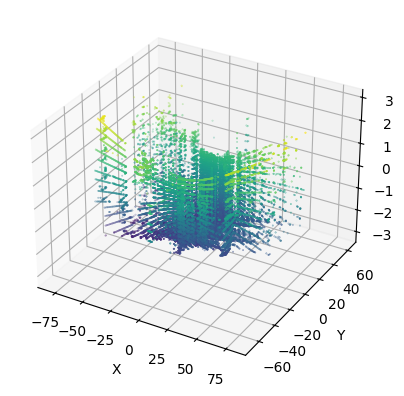

In [5]:
# Extract the x, y, and z coordinates from point cloud
x  =  pc[:, 0]
y  =  pc[:, 1]
z  =  pc[:, 2]

# Plot the point cloud
fig  =  plt.figure()
ax  =  fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, s = 0.1, c = z, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [6]:
# visualize the point cloud using open3d

point_cloud  =  o3d.geometry.PointCloud()
point_cloud.points  =  o3d.utility.Vector3dVector(pc[:, :3])

o3d.visualization.draw_geometries([point_cloud])

In [7]:
# Reading calib file

calib_dict  =  {}
# cwd = os.getcwd()
# calib = open(calib_path,'r')

with open(calib_path, 'r') as f:
    for line in f.readlines():
        line  =  line.rstrip()

        if len(line)  ==  0:
            continue
        key, value  =  line.split(':', 1)
        print(key, value,'\n')

        # The only non-float values in these files are dates, which
        # we don't care about anyway
        try:
            calib_dict[key]  =  np.array([float(x) for x in value.split()])
        except ValueError:
            pass

P0  7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 0.000000000000e+00 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 

P1  7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 -3.875744000000e+02 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 

P2  7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 4.485728000000e+01 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 2.163791000000e-01 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 2.745884000000e-03 

P3  7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 -3.395242000000e+02 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 2.199936000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 2.729905000000e-03 

R0_rect  9.999239000000e-01 9.837760000000e-03 -7.445048000000

In [8]:
calib_list = ['P0','P1','P2','P3','R0_rect','Tr_velo_to_cam','Tr_imu_to_velo']

print("All matrices and contents before resize")
for i in calib_dict.keys():
    print(f'\n\t {i} -------> shape: {calib_dict[i].shape}')

All matrices and contents before resize

	 P0 -------> shape: (12,)

	 P1 -------> shape: (12,)

	 P2 -------> shape: (12,)

	 P3 -------> shape: (12,)

	 R0_rect -------> shape: (9,)

	 Tr_velo_to_cam -------> shape: (12,)

	 Tr_imu_to_velo -------> shape: (12,)


In [9]:
# resize matrices shape

print('Reshape P0, P1, P2, P3 matrices into 3*4')
for i in ['P0','P1','P2','P3']:
    calib_dict[i] = calib_dict[i].reshape((3, 4))
    print(f'{i} reshaped into {calib_dict[i].shape}')

Reshape P0, P1, P2, P3 matrices into 3*4
P0 reshaped into (3, 4)
P1 reshaped into (3, 4)
P2 reshaped into (3, 4)
P3 reshaped into (3, 4)


In [10]:
# Tr_velo_to_cam and Tr_imu_to_velo converted one time only ......to convert use the line commented.
# if run multiple times you will get error

for i in calib_list[5:]:
    print('\n', i, calib_dict[i].shape,'\n')
    print(calib_dict[i])
    calib_dict[i] = np.vstack((calib_dict[i].reshape(3, 4), np.array([0., 0., 0., 1.])))
    print('\nafter resizing......')
    print(i, '\t', calib_dict[i].shape,'\n')
    print(calib_dict[i])


 Tr_velo_to_cam (12,) 

[ 7.533745e-03 -9.999714e-01 -6.166020e-04 -4.069766e-03  1.480249e-02
  7.280733e-04 -9.998902e-01 -7.631618e-02  9.998621e-01  7.523790e-03
  1.480755e-02 -2.717806e-01]

after resizing......
Tr_velo_to_cam 	 (4, 4) 

[[ 7.533745e-03 -9.999714e-01 -6.166020e-04 -4.069766e-03]
 [ 1.480249e-02  7.280733e-04 -9.998902e-01 -7.631618e-02]
 [ 9.998621e-01  7.523790e-03  1.480755e-02 -2.717806e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]

 Tr_imu_to_velo (12,) 

[ 9.999976e-01  7.553071e-04 -2.035826e-03 -8.086759e-01 -7.854027e-04
  9.998898e-01 -1.482298e-02  3.195559e-01  2.024406e-03  1.482454e-02
  9.998881e-01 -7.997231e-01]

after resizing......
Tr_imu_to_velo 	 (4, 4) 

[[ 9.999976e-01  7.553071e-04 -2.035826e-03 -8.086759e-01]
 [-7.854027e-04  9.998898e-01 -1.482298e-02  3.195559e-01]
 [ 2.024406e-03  1.482454e-02  9.998881e-01 -7.997231e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]


In [11]:
# R0_rect resizing the rectification matrix
# run once

print('R0_rect matrix')
print(calib_dict['R0_rect'])

print('\n raw matrix size',calib_dict['R0_rect'].shape)

# reshape into  3*3
reshaped_calib = calib_dict['R0_rect'].reshape(3,3)  

print('\n reshaped matrix size', reshaped_calib.shape,'\n')
print('R0_rect reshaped matrix')
print(reshaped_calib)

print('\n converting into Homogeneous\n')

R0_rect = np.eye(4)

R0_rect[:3, :3] = reshaped_calib
calib_dict['R0_rect'] = R0_rect

print(calib_dict['R0_rect'])

R0_rect matrix
[ 0.9999239   0.00983776 -0.00744505 -0.0098698   0.9999421  -0.00427846
  0.00740253  0.00435161  0.9999631 ]

 raw matrix size (9,)

 reshaped matrix size (3, 3) 

R0_rect reshaped matrix
[[ 0.9999239   0.00983776 -0.00744505]
 [-0.0098698   0.9999421  -0.00427846]
 [ 0.00740253  0.00435161  0.9999631 ]]

 converting into Homogeneous

[[ 0.9999239   0.00983776 -0.00744505  0.        ]
 [-0.0098698   0.9999421  -0.00427846  0.        ]
 [ 0.00740253  0.00435161  0.9999631   0.        ]
 [ 0.          0.          0.          1.        ]]


In [12]:
#printin all all matrices

for i in calib_list:
    print(f'{i} shape:{calib_dict[i].shape} \n')
    print(calib_dict[i],'\n')

P0 shape:(3, 4) 

[[721.5377   0.     609.5593   0.    ]
 [  0.     721.5377 172.854    0.    ]
 [  0.       0.       1.       0.    ]] 

P1 shape:(3, 4) 

[[ 721.5377    0.      609.5593 -387.5744]
 [   0.      721.5377  172.854     0.    ]
 [   0.        0.        1.        0.    ]] 

P2 shape:(3, 4) 

[[7.215377e+02 0.000000e+00 6.095593e+02 4.485728e+01]
 [0.000000e+00 7.215377e+02 1.728540e+02 2.163791e-01]
 [0.000000e+00 0.000000e+00 1.000000e+00 2.745884e-03]] 

P3 shape:(3, 4) 

[[ 7.215377e+02  0.000000e+00  6.095593e+02 -3.395242e+02]
 [ 0.000000e+00  7.215377e+02  1.728540e+02  2.199936e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00  2.729905e-03]] 

R0_rect shape:(4, 4) 

[[ 0.9999239   0.00983776 -0.00744505  0.        ]
 [-0.0098698   0.9999421  -0.00427846  0.        ]
 [ 0.00740253  0.00435161  0.9999631   0.        ]
 [ 0.          0.          0.          1.        ]] 

Tr_velo_to_cam shape:(4, 4) 

[[ 7.533745e-03 -9.999714e-01 -6.166020e-04 -4.069766e-03]
 [ 1.4802

In [13]:
# projection matrix for velo to cam

proj_mat_velo_to_cam2 = calib_dict['P2']@calib_dict['R0_rect']@calib_dict['Tr_velo_to_cam']

print(proj_mat_velo_to_cam2)
print('\nThe size of the proj_mat_velo_to_cam2 is',proj_mat_velo_to_cam2.shape)

[[ 6.09695409e+02 -7.21421597e+02 -1.25125855e+00 -1.23041806e+02]
 [ 1.80384202e+02  7.64479802e+00 -7.19651474e+02 -1.01016688e+02]
 [ 9.99945389e-01  1.24365378e-04  1.04513030e-02 -2.69386912e-01]]

The size of the proj_mat_velo_to_cam2 is (3, 4)


In [14]:
print('Point cloud shape: ', pc.shape)

pc_3d_only = pc[:, :3]
pc_3d_only = pc_3d_only.transpose()

print('after transpose shape: ', pc_3d_only.shape)

pc_2d_hom = np.vstack((pc_3d_only, np.ones((1, pc_3d_only.shape[1]))))

print('homogenous shape: ', pc_2d_hom.shape)

Point cloud shape:  (122798, 4)
after transpose shape:  (3, 122798)
homogenous shape:  (4, 122798)


In [15]:
pc_render_points = proj_mat_velo_to_cam2@pc_2d_hom

print(pc_render_points)

pc_render_points[:2, :] /=  pc_render_points[2, :]

pc_render_points[:2, :]

print('\n', pc_render_points)

[[3.86390562e+04 3.81062508e+04 3.77437399e+04 ... 3.19630708e+03
  3.17660613e+03 3.19341674e+03]
 [1.15083976e+04 1.13998050e+04 1.13158908e+04 ... 1.83298366e+03
  1.82609952e+03 1.83832198e+03]
 [7.47426250e+01 7.40424442e+01 7.35032899e+01 ... 3.47584740e+00
  3.46492348e+00 3.48880676e+00]]

 [[516.96145521 514.65414547 513.49728621 ... 919.57635492 916.78969211
  915.33207593]
 [153.97368802 153.96311038 153.95080681 ... 527.34871444 527.02448556
  526.91997808]
 [ 74.74262499  74.04244417  73.50328987 ...   3.4758474    3.46492348
    3.48880676]]


In [16]:
pts_2d = pc_render_points[:2, :]
print(pts_2d)

[[516.96145521 514.65414547 513.49728621 ... 919.57635492 916.78969211
  915.33207593]
 [153.97368802 153.96311038 153.95080681 ... 527.34871444 527.02448556
  526.91997808]]


In [17]:
inds  =  np.where((pts_2d[0, :] < img_width) & (pts_2d[0, :] >=  0) &
                    (pts_2d[1, :] < img_height) & (pts_2d[1, :] >=  0) &
                    (pc_3d_only.transpose()[:, 0] > 0))[0]

print('Image width: ', img_width)
print(inds.shape)

Image width:  1242
(19423,)


In [18]:
# Filter out pixels points
imgfov_pc_pixel  =  pts_2d[:, inds]
imgfov_pc_pixel

array([[516.96145521, 514.65414547, 513.49728621, ..., 623.46579331,
        621.12091998, 618.76372297],
       [153.97368802, 153.96311038, 153.95080681, ..., 369.18098229,
        369.21091122, 369.23050486]])

In [19]:
print(pc_3d_only.transpose().shape)

# Retrieve depth from lidar
imgfov_pc_velo  =  pc_3d_only.transpose()[inds, :]
print(imgfov_pc_velo)

(122798, 3)
[[ 7.4986e+01  9.6380e+00  2.7660e+00]
 [ 7.4286e+01  9.7850e+00  2.7430e+00]
 [ 7.3747e+01  9.8320e+00  2.7250e+00]
 ...
 [ 6.4250e+00 -4.2000e-02 -1.6790e+00]
 [ 6.4210e+00 -2.2000e-02 -1.6780e+00]
 [ 6.4250e+00 -2.0000e-03 -1.6790e+00]]


In [20]:
 # Retrieve depth from lidar
imgfov_pc_velo  =  pc_3d_only.transpose()[inds, :]

imgfov_pc_velo  =  np.hstack((imgfov_pc_velo, np.ones((imgfov_pc_velo.shape[0], 1))))

# imgfov_pc_velo.shape
print(imgfov_pc_velo.shape)

(19423, 4)


In [21]:
imgfov_pc_cam2  =  proj_mat_velo_to_cam2@imgfov_pc_velo.transpose()
print(imgfov_pc_cam2)

[[3.86390562e+04 3.81062508e+04 3.77437399e+04 ... 3.82665188e+03
  3.80978331e+03 3.79779502e+03]
 [1.15083976e+04 1.13998050e+04 1.13158908e+04 ... 2.26592560e+03
  2.26463724e+03 2.26623139e+03]
 [7.47426250e+01 7.40424442e+01 7.35032899e+01 ... 6.13770944e+00
  6.13372241e+00 6.13771441e+00]]


In [22]:
# cmap  =  plt.cm.get_cmap('hsv', 256)

cmap  =  plt.colormaps["hsv"].resampled(256)
cmap  =  np.array([cmap(i) for i in range(256)])[:, :3] * 255
print(cmap.shape)

(256, 3)


In [23]:
for i in range(imgfov_pc_pixel.shape[1]):
    depth  =  abs(imgfov_pc_cam2[2, i])
    color  =  cmap[int(640.0 / (depth*100)),:]
    cv2.circle(img, (int(np.round(imgfov_pc_pixel[0, i])),
                         int(np.round(imgfov_pc_pixel[1, i]))),
                   2, color = tuple(color), thickness = -1)

cv2.imshow('LiDAR on Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
for point in imgfov_pc_cam2:
    # Get 2D image coordinates of the point
    x, y  =  int(point[0]), int(point[1])

    # Set color or intensity value for the point
    color  =  (0, 255, 0)  # Green color for example

    # Draw a circle or mark the point on the image
    cv2.circle(img, (x, y), radius = 2, color = color, thickness = -1)

# Display the image with rendered LiDAR points
cv2.imshow('LiDAR on Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()